In [1]:
##  employment&compensation_data_final_1
#dependencies
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#read in CSVs
file_one = pd.read_csv("per_capita_income_final.csv")
file_two = pd.read_csv("employment_compensation_final.csv")
file_three = pd.read_csv("total_employment_final.csv")

In [3]:
#population and per capita income per metro area
percapita_income_df = pd.DataFrame(file_one)
percapita_income_df = percapita_income_df[~percapita_income_df['Description'].isin(['Personal income (thousands of dollars)'])]
percapita_income_df

,GeoName,Description,2012,2013,2014,2015,2016
1,"Houston-The Woodlands-Sugar Land, TX (Metropol...",Population (persons) 1/,6180817,6324167,6488046,6647465,6772470
2,"Houston-The Woodlands-Sugar Land, TX (Metropol...",Per capita personal income (dollars) 2/,51676,50979,53791,53859,51913
4,"New York-Newark-Jersey City, NY-NJ-PA (Metropo...",Population (persons) 1/,19864434,19968845,20052234,20118063,20153634
5,"New York-Newark-Jersey City, NY-NJ-PA (Metropo...",Per capita personal income (dollars) 2/,59296,59947,62086,64679,65846
7,"San Francisco-Oakland-Hayward, CA (Metropolita...",Population (persons) 1/,4458646,4521994,4585623,4642227,4679166
8,"San Francisco-Oakland-Hayward, CA (Metropolita...",Per capita personal income (dollars) 2/,69751,70352,75042,81241,84675
10,"San Jose-Sunnyvale-Santa Clara, CA (Metropolit...",Population (persons) 1/,1895787,1924432,1947922,1968578,1978816
11,"San Jose-Sunnyvale-Santa Clara, CA (Metropolit...",Per capita personal income (dollars) 2/,71846,71428,77227,84150,87643


In [4]:
#total compensation/salary info by industry per metro area from 2012-2016
#got rid of extraneous rows that did not have industry-specific information
industry_compensation_df = pd.DataFrame(file_two)
industry_compensation_df = industry_compensation_df[~industry_compensation_df['Description'].isin(['Total compensation of employees', 'Compensation of employees (thousands of dollars) 1/', '  Wages and salaries', '  Supplements to wages and salaries', '    Employer contributions for employee pension and insurance funds 2/', '    Employer contributions for government social insurance', 'Average compensation per job (dollars) 3/', 'Compensation of employees by industry'])]
#need to find a way to pull the highest grossing industries (let's pick 5) for each metro area, groupby gives us a start
#we can use info from the employment DF(in the next DF) to see the % of population in each metro area working in said industries.
#gives us insight to concentration of wealth,etc. (can also pull the 5 lowest grossing industries and see what % of pop works there)
industry_compensation_df = industry_compensation_df.groupby('GeoName').head() 
industry_compensation_df.head()


,GeoName,Description,2012,2013,2014,2015,2016
8,"Houston-The Woodlands-Sugar Land, TX (Metropol...",Farm compensation,87706,78219,93233,104200,91513
9,"Houston-The Woodlands-Sugar Land, TX (Metropol...",Nonfarm compensation,203065683,213426891,229891503,238735675,234319453
10,"Houston-The Woodlands-Sugar Land, TX (Metropol...",Private nonfarm compensation,178648462,188163187,203304342,210093294,204328445
11,"Houston-The Woodlands-Sugar Land, TX (Metropol...","Forestry, fishing, and related activities","55,513 E",59601,64609,69680,70220
12,"Houston-The Woodlands-Sugar Land, TX (Metropol...",Forestry and logging,(D),(D),(D),8313,(D)


In [5]:
#total employment info by industry per metro area from 2012-2016
total_employment_df = pd.DataFrame(file_three)
total_employment_df = total_employment_df[~total_employment_df['Description'].isin(['Employment by place of work', 'Total employment (number of jobs)', 'By type', '  Wage and salary employment', '  Proprietors employment', '    Farm proprietors employment', '    Nonfarm proprietors employment 2/', 'By industry'])]
total_employment_df.keys()


Index(['GeoName', 'Description', '2012', '2013', '2014', '2015', '2016'], dtype='object')

In [6]:
# CA only (Total Employment)
CA_metros = total_employment_df[total_employment_df['GeoName'].str.contains(", CA")]

# CA 2012
CA_metros_2012 = CA_metros[["GeoName", "Description", "2012"]]
CA_metros_2012["2012"] = pd.to_numeric(CA_metros_2012["2012"], errors = 'coerce')
CA_emp_12 = CA_metros_2012.groupby(CA_metros_2012["Description"]).sum().sort_values(by = "2012", ascending=False)
# CA 2013
CA_metros_2013 = CA_metros[["GeoName", "Description", "2013"]]
CA_metros_2013["2013"] = pd.to_numeric(CA_metros_2013["2013"], errors = 'coerce')
CA_emp_13 = CA_metros_2013.groupby(CA_metros_2013["Description"]).sum().sort_values(by = "2013", ascending=False)
# CA 2014
CA_metros_2014 = CA_metros[["GeoName", "Description", "2014"]]
CA_metros_2014["2014"] = pd.to_numeric(CA_metros_2014["2014"], errors = 'coerce')
CA_emp_14 = CA_metros_2014.groupby(CA_metros_2014["Description"]).sum().sort_values(by = "2014", ascending=False)
# CA 2015
CA_metros_2015 = CA_metros[["GeoName", "Description", "2015"]]
CA_metros_2015["2015"] = pd.to_numeric(CA_metros_2015["2015"], errors = 'coerce')
CA_emp_15 = CA_metros_2015.groupby(CA_metros_2015["Description"]).sum().sort_values(by = "2015", ascending=False)
# CA 2016
CA_metros_2016 = CA_metros[["GeoName", "Description", "2016"]]
CA_metros_2016["2016"] = pd.to_numeric(CA_metros_2016["2016"], errors = 'coerce')
CA_emp_16 = CA_metros_2016.groupby(CA_metros_2016["Description"]).sum().sort_values(by = "2016", ascending=False)

#All together
CA_emp = pd.merge(CA_emp_12.head(10), CA_emp_13.head(10), left_index=True, right_index=True, how = 'outer')
CA_emp = pd.merge(CA_emp, CA_emp_14.head(10), left_index=True, right_index=True, how = 'outer')
CA_emp = pd.merge(CA_emp, CA_emp_15.head(10), left_index=True, right_index=True, how = 'outer')
CA_emp = pd.merge(CA_emp, CA_emp_16.head(10), left_index=True, right_index=True, how = 'outer')
CA_emp_sorted = CA_emp.sort_values(by = "2016", ascending=False)

CA_emp_sorted=CA_emp_sorted.reset_index()
CA_emp_sorted.drop(CA_emp_sorted.index[[0,1,5]], inplace=True)
CA_emp_sorted_top_five=CA_emp_sorted.head(5)
CA_emp_sorted_top_five.set_index(["Description"], inplace=True)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata

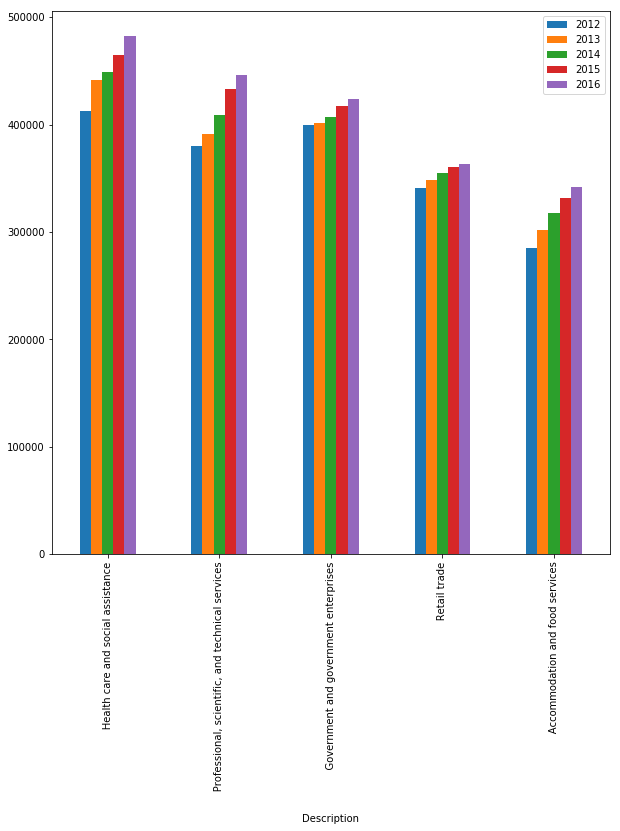

In [7]:
#plot
CA_emp_sorted_top_five.plot(kind="bar", figsize=(10,10))
plt.show()

In [8]:
# TX only (Total Employment)
TX_metros = total_employment_df[total_employment_df['GeoName'].str.contains(", TX")]

# TX 2012
TX_metros_2012 = TX_metros[["GeoName", "Description", "2012"]]
TX_metros_2012["2012"] = pd.to_numeric(TX_metros_2012["2012"], errors = 'coerce')
TX_emp_12 = TX_metros_2012.groupby(TX_metros_2012["Description"]).sum().sort_values(by = "2012", ascending=False)
# TX 2013
TX_metros_2013 = TX_metros[["GeoName", "Description", "2013"]]
TX_metros_2013["2013"] = pd.to_numeric(TX_metros_2013["2013"], errors = 'coerce')
TX_emp_13 = TX_metros_2013.groupby(TX_metros_2013["Description"]).sum().sort_values(by = "2013", ascending=False)
# TX 2014
TX_metros_2014 = TX_metros[["GeoName", "Description", "2014"]]
TX_metros_2014["2014"] = pd.to_numeric(TX_metros_2014["2014"], errors = 'coerce')
TX_emp_14 = TX_metros_2014.groupby(TX_metros_2014["Description"]).sum().sort_values(by = "2014", ascending=False)
# TX 2015
TX_metros_2015 = TX_metros[["GeoName", "Description", "2015"]]
TX_metros_2015["2015"] = pd.to_numeric(TX_metros_2015["2015"], errors = 'coerce')
TX_emp_15 = TX_metros_2015.groupby(TX_metros_2015["Description"]).sum().sort_values(by = "2015", ascending=False)
# TX 2016
TX_metros_2016 = TX_metros[["GeoName", "Description", "2016"]]
TX_metros_2016["2016"] = pd.to_numeric(TX_metros_2016["2016"], errors = 'coerce')
TX_emp_16 = TX_metros_2016.groupby(TX_metros_2016["Description"]).sum().sort_values(by = "2016", ascending=False)

#All together
TX_emp = pd.merge(TX_emp_12.head(10), TX_emp_13.head(10), left_index=True, right_index=True, how = 'outer')
TX_emp = pd.merge(TX_emp, TX_emp_14.head(10), left_index=True, right_index=True, how = 'outer')
TX_emp = pd.merge(TX_emp, TX_emp_15.head(10), left_index=True, right_index=True, how = 'outer')
TX_emp = pd.merge(TX_emp, TX_emp_16.head(10), left_index=True, right_index=True, how = 'outer')
TX_emp_sorted = TX_emp.sort_values(by = "2016", ascending=False)
TX_emp_sorted.head(10)
TX_emp_sorted=TX_emp_sorted.reset_index()
TX_emp_sorted.drop(TX_emp_sorted.index[[0,1,5]], inplace=True)

TX_emp_sorted_top_five=TX_emp_sorted.head(5)
TX_emp_sorted_top_five.set_index(["Description"], inplace=True)
TX_emp_sorted_top_five.head(5)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata

,2012,2013,2014,2015,2016
Description,,,,,
Government and government enterprises,373836.0,378825.0,384654.0,392731.0,404059.0
Health care and social assistance,NaN,NaN,349444.0,NaN,377159.0
Retail trade,340288.0,344541.0,354785.0,368591.0,376697.0
Construction,267554.0,281456.0,299676.0,313615.0,311369.0
Accommodation and food services,249256.0,263718.0,NaN,NaN,303615.0


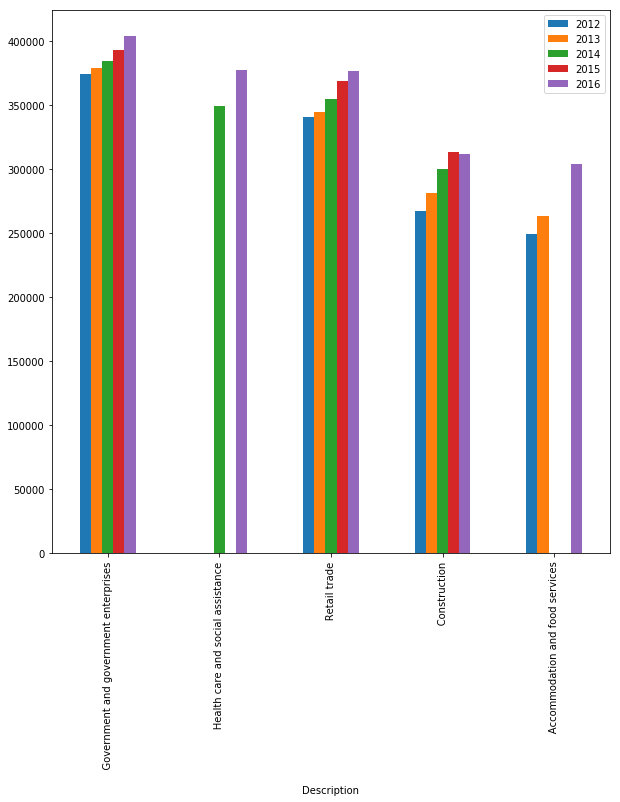

In [9]:
#plot
TX_emp_sorted_top_five.plot(kind="bar", figsize=(10,10))
plt.show()

In [10]:
# NY only
NY_metros = total_employment_df[total_employment_df['GeoName'].str.contains(", NY")]

# NY 2012
NY_metros_2012 = NY_metros[["GeoName", "Description", "2012"]]
NY_metros_2012["2012"] = pd.to_numeric(NY_metros_2012["2012"], errors = 'coerce')
NY_emp_12 = NY_metros_2012.groupby(NY_metros_2012["Description"]).sum().sort_values(by = "2012", ascending=False)
# NY 2013
NY_metros_2013 = NY_metros[["GeoName", "Description", "2013"]]
NY_metros_2013["2013"] = pd.to_numeric(NY_metros_2013["2013"], errors = 'coerce')
NY_emp_13 = NY_metros_2013.groupby(NY_metros_2013["Description"]).sum().sort_values(by = "2013", ascending=False)
# NY 2014
NY_metros_2014 = NY_metros[["GeoName", "Description", "2014"]]
NY_metros_2014["2014"] = pd.to_numeric(NY_metros_2014["2014"], errors = 'coerce')
NY_emp_14 = NY_metros_2014.groupby(NY_metros_2014["Description"]).sum().sort_values(by = "2014", ascending=False)
# NY 2015
NY_metros_2015 = NY_metros[["GeoName", "Description", "2015"]]
NY_metros_2015["2015"] = pd.to_numeric(NY_metros_2015["2015"], errors = 'coerce')
NY_emp_15 = NY_metros_2015.groupby(NY_metros_2015["Description"]).sum().sort_values(by = "2015", ascending=False)
# NY 2016
NY_metros_2016 = NY_metros[["GeoName", "Description", "2016"]]
NY_metros_2016["2016"] = pd.to_numeric(NY_metros_2016["2016"], errors = 'coerce')
NY_emp_16 = NY_metros_2016.groupby(NY_metros_2016["Description"]).sum().sort_values(by = "2016", ascending=False)

#All together
NY_emp = pd.merge(NY_emp_12.head(10), NY_emp_13.head(10), left_index=True, right_index=True, how = 'outer')
NY_emp = pd.merge(NY_emp, NY_emp_14.head(10), left_index=True, right_index=True, how = 'outer')
NY_emp = pd.merge(NY_emp, NY_emp_15.head(10), left_index=True, right_index=True, how = 'outer')
NY_emp = pd.merge(NY_emp, NY_emp_16.head(10), left_index=True, right_index=True, how = 'outer')
NY_emp_sorted = NY_emp.sort_values(by = "2016", ascending=False)
NY_emp_sorted.head(10)

NY_emp_sorted=NY_emp_sorted.reset_index()
NY_emp_sorted.drop(NY_emp_sorted.index[[0,1,5]], inplace=True)

NY_emp_sorted_top_five=NY_emp_sorted.head(5)
NY_emp_sorted_top_five.set_index(["Description"], inplace=True)
NY_emp_sorted_top_five.head(5)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata

,2012,2013,2014,2015,2016
Description,,,,,
Health care and social assistance,1554826.0,1584426.0,1615424.0,1652914.0,1704630.0
Government and government enterprises,1319710.0,1316198.0,1314625.0,1317038.0,1314029.0
"Professional, scientific, and technical services",1035937.0,1067061.0,NaN,1139017.0,1169547.0
Retail trade,1061106.0,1085834.0,1109566.0,1120751.0,1121972.0
Finance and insurance,954583.0,967538.0,951146.0,975483.0,971003.0


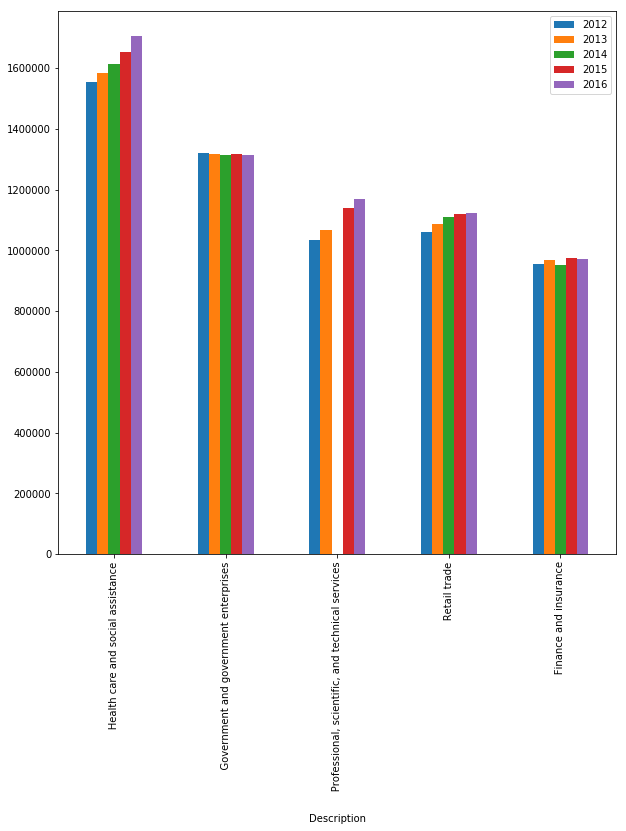

In [11]:
#plot
NY_emp_sorted_top_five.plot(kind="bar", figsize=(10,10))
plt.show()